# CS-401: Milestone P2

This notebook aims to provide a basic primary pre-processing and analysis of datasets that we will be using. The pre-processing pipeline is divided into three parts: loading, cleaning and merging. One can have a look of this pipeline in the `preprocessing` folder. For more information, look at the `README`.

In [1]:
import sys

sys.path.append("./preprocessing")
sys.path.append("./analysis")

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

import loader as loader
import cleaner as cleaner
import merger as merger

%load_ext autoreload
%autoreload 2

# I. Preprocessing

## I.1. Load the data

We first start by loading datasets. CMU dataset is loaded as well as external dataset like Bechdel and TMDB dataset since these will be useful later for a more in-depth analysis.

In [2]:
# =============== LOADER =============== #
# CMU Dataset
character_df, movie_df = loader.load_CMU_dataset()
summaries_df = loader.load_summaries()

# External Dataset
bechdel_df = loader.load_bechdel_dataset()
credits_df, meta_df = loader.load_tmdb_dataset()

## I.2. Basic cleaning

Here, we perform basic data cleaning operations on dataframes, such as renaming columns and converting date strings into Python datetime objects. To handle the credits dataframe, you can refer to this [function](./preprocessing/cleaner.py#clean_credit_df). Our objective is to analyze women's representation in the film industry, and to do this, we require information about the gender of the crew members for movies. We observed that this information was frequently missing, while full names were always provided. As a solution, we utilized the `genderguesser` package to predict the gender based on the first name. This approach allows us to reduce the number of ungendered samples without discarding entire rows.

In [3]:
# =============== CLEAN =============== #
# Clean datasets
movie_df = cleaner.clean_movie_df(movie_df)
bechdel_df = cleaner.clean_bechdel_df(bechdel_df)
credits_df = cleaner.clean_credit_df(credits_df, meta_df)
meta_df = cleaner.clean_metadata_df(meta_df)

Before using genderguesser:
Percentage of movies with a director's name that could not be gendered: 39.44%
Percentage of movies with a producer's name that could not be gendered: 70.92%
Percentage of movies with a writer's name that could not be gendered:   77.54%


C:\Users\kenji\OneDrive\Documents\EPFL\MA3\ADA\Projet_1\milestone_2\projet_2 perso\./preprocessing\cleaner.py:91: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '['M' 'F' 'F' ... 'M' 'M' nan]' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  credit_df.loc[
C:\Users\kenji\OneDrive\Documents\EPFL\MA3\ADA\Projet_1\milestone_2\projet_2 perso\./preprocessing\cleaner.py:96: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '['M' 'M' 'F' ... 'M' 'M' nan]' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  credit_df.loc[
C:\Users\kenji\OneDrive\Documents\EPFL\MA3\ADA\Projet_1\milestone_2\projet_2 perso\./preprocessing\cleaner.py:101: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[nan 'M' 'F' ... 'M' nan nan]


After using genderguesser:
Percentage of movies with a director's name that could not be gendered: 6.55%
Percentage of movies with a producer's name that could not be gendered: 54.08%
Percentage of movies with a writer's name that could not be gendered:   57.74%


## I.3. Merging all datasets

In [4]:
# =============== MERGE =============== #
# Merge datasets
movies = merger.merge_with_char(movie_df, character_df)
movies = merger.merge_with_summaries(movies, summaries_df)
movies = merger.merge_with_metadata(movies, meta_df)
movies = merger.merge_with_credits(movies, credits_df)

# Put the actor_name column at the beginning
movies = movies.reindex(columns=['actor_name'] + [col for col in movies.columns if col != 'actor_name'])
display(movies.sample(5))

# It will be useful when we will analyze the effect of the bechdel score rating on 
# the women's representation in movies
movies_with_bechdel = merger.merge_with_bechdel(movies, bechdel_df)

,actor_name,wikiID,freebaseID,movie_title,movie_release_date,movie_bo_revenue,movie_runtime,fbid_languages,fbid_countries,fbid_genres,...,popularity,vote_average,imdbid,id,director,director_gender,producer,producer_gender,writer,writer_gender
81820,Kelly Macdonald,3079162,/m/08pz9v,Nanny McPhee,2005-10-21,122489822.0,99.0,[English Language],"[United States of America, France, United King...","[Family Film, Fantasy Comedy, Fantasy, Comedy]",...,9.806554,6.4,0396752,11283,Kirk Jones,M,Tim Bevan,M,NaN,NaN
120086,Lee Remick,20693171,/m/051ywg5,These Thousand Hills,1959-05-08,NaN,96.0,[English Language],[United States of America],"[Action/Adventure, Western]",...,0.454578,4.6,0053350,80320,John Guillermin,M,NaN,NaN,NaN,NaN
102350,Adrien Brody,4066047,/m/0bgb8v,Hollywoodland,2006-08-31,NaN,126.0,"[English Language, Spanish Language]",[United States of America],"[Thriller, Crime Fiction, Detective fiction, B...",...,7.464981,6.1,0427969,1249,Allen Coulter,M,Glenn Williamson,M,NaN,NaN
86727,Zach Galifianakis,948784,/m/03sk83,Bubble Boy,2001-08-23,5007898.0,86.0,[English Language],[United States of America],"[Romantic comedy, Adventure, Road movie, Gross...",...,10.295438,5.1,0258470,9683,Blair Hayes,NaN,Beau Flynn,M,NaN,NaN
29699,Rozonda Thomas,1712963,/m/05qfnl,Snow Day,2000-01-29,62464731.0,89.0,[English Language],[United States of America],"[Adventure, Children's/Family, Children's, Com...",...,6.295701,4.8,0184907,15489,Chris Koch,M,NaN,NaN,Will McRobb,M


In [5]:
# Alternatively:
# You can directly load full cleaned and merged data
# movies = pd.read_pickle("./data/Processed/movies_cleaned.pkl")

# II. Exploratory & Basic Analysis

Now, let's explore and try to understand the data. 

In [6]:
# Import our visualization tools
import visualizer as viz

In [7]:
movies.drop(columns=['wikiID']).describe()

,movie_release_date,movie_bo_revenue,movie_runtime,year,actor_height_meters,actor_age_at_movie_release,vote_average
count,126290,7.191300e+04,124760.000000,126290.000000,61081.000000,97620.000000,126290.000000
mean,1991-09-26 05:39:04.945759744,8.389626e+07,106.590008,1991.207182,1.794253,38.528396,6.075294
min,1902-09-01 00:00:00,1.140800e+04,1.250000,1902.000000,0.610000,-81.000000,0.000000
25%,1983-12-12 00:00:00,7.724701e+06,92.000000,1983.000000,1.680000,28.000000,5.500000
50%,1999-05-28 00:00:00,2.807807e+07,102.000000,1999.000000,1.760000,37.000000,6.200000
75%,2006-12-20 00:00:00,9.075381e+07,116.000000,2006.000000,1.830000,48.000000,6.800000
max,2014-03-28 00:00:00,2.782275e+09,1003.000000,2014.000000,510.000000,96.000000,10.000000
std,NaN,1.567086e+08,26.240080,20.838320,4.238687,14.559805,1.147225


As one can see, there are outliers and dirty samples in the data. We will remove them in the next section.

In [8]:
movies = cleaner.clean_movies_ranges(movies)
movies = cleaner.clean_remove_outlier(movies, method='quantile', name='actor_height_meters')
movies = cleaner.clean_remove_outlier(movies, method='quantile', name='movie_runtime')

movies.drop(columns=['wikiID']).describe()

,movie_release_date,movie_bo_revenue,movie_runtime,year,actor_height_meters,actor_age_at_movie_release,vote_average
count,57103,3.845700e+04,57103.000000,57103.000000,57103.000000,55424.000000,57103.000000
mean,1993-12-16 06:11:51.514281088,8.787368e+07,104.780915,1993.432184,1.756534,37.942895,6.018703
min,1914-03-08 00:00:00,1.263600e+04,57.000000,1914.000000,1.470000,0.000000,0.000000
25%,1988-04-22 00:00:00,9.493259e+06,93.000000,1988.000000,1.680000,28.000000,5.500000
50%,1999-11-17 00:00:00,3.238238e+07,102.000000,1999.000000,1.760000,36.000000,6.100000
75%,2006-09-15 00:00:00,9.841006e+07,115.000000,2006.000000,1.830000,46.000000,6.700000
max,2012-11-21 00:00:00,1.511758e+09,153.000000,2012.000000,2.050000,95.000000,10.000000
std,NaN,1.465971e+08,16.421360,18.293721,0.099834,13.892007,1.063204


Todo: explain next

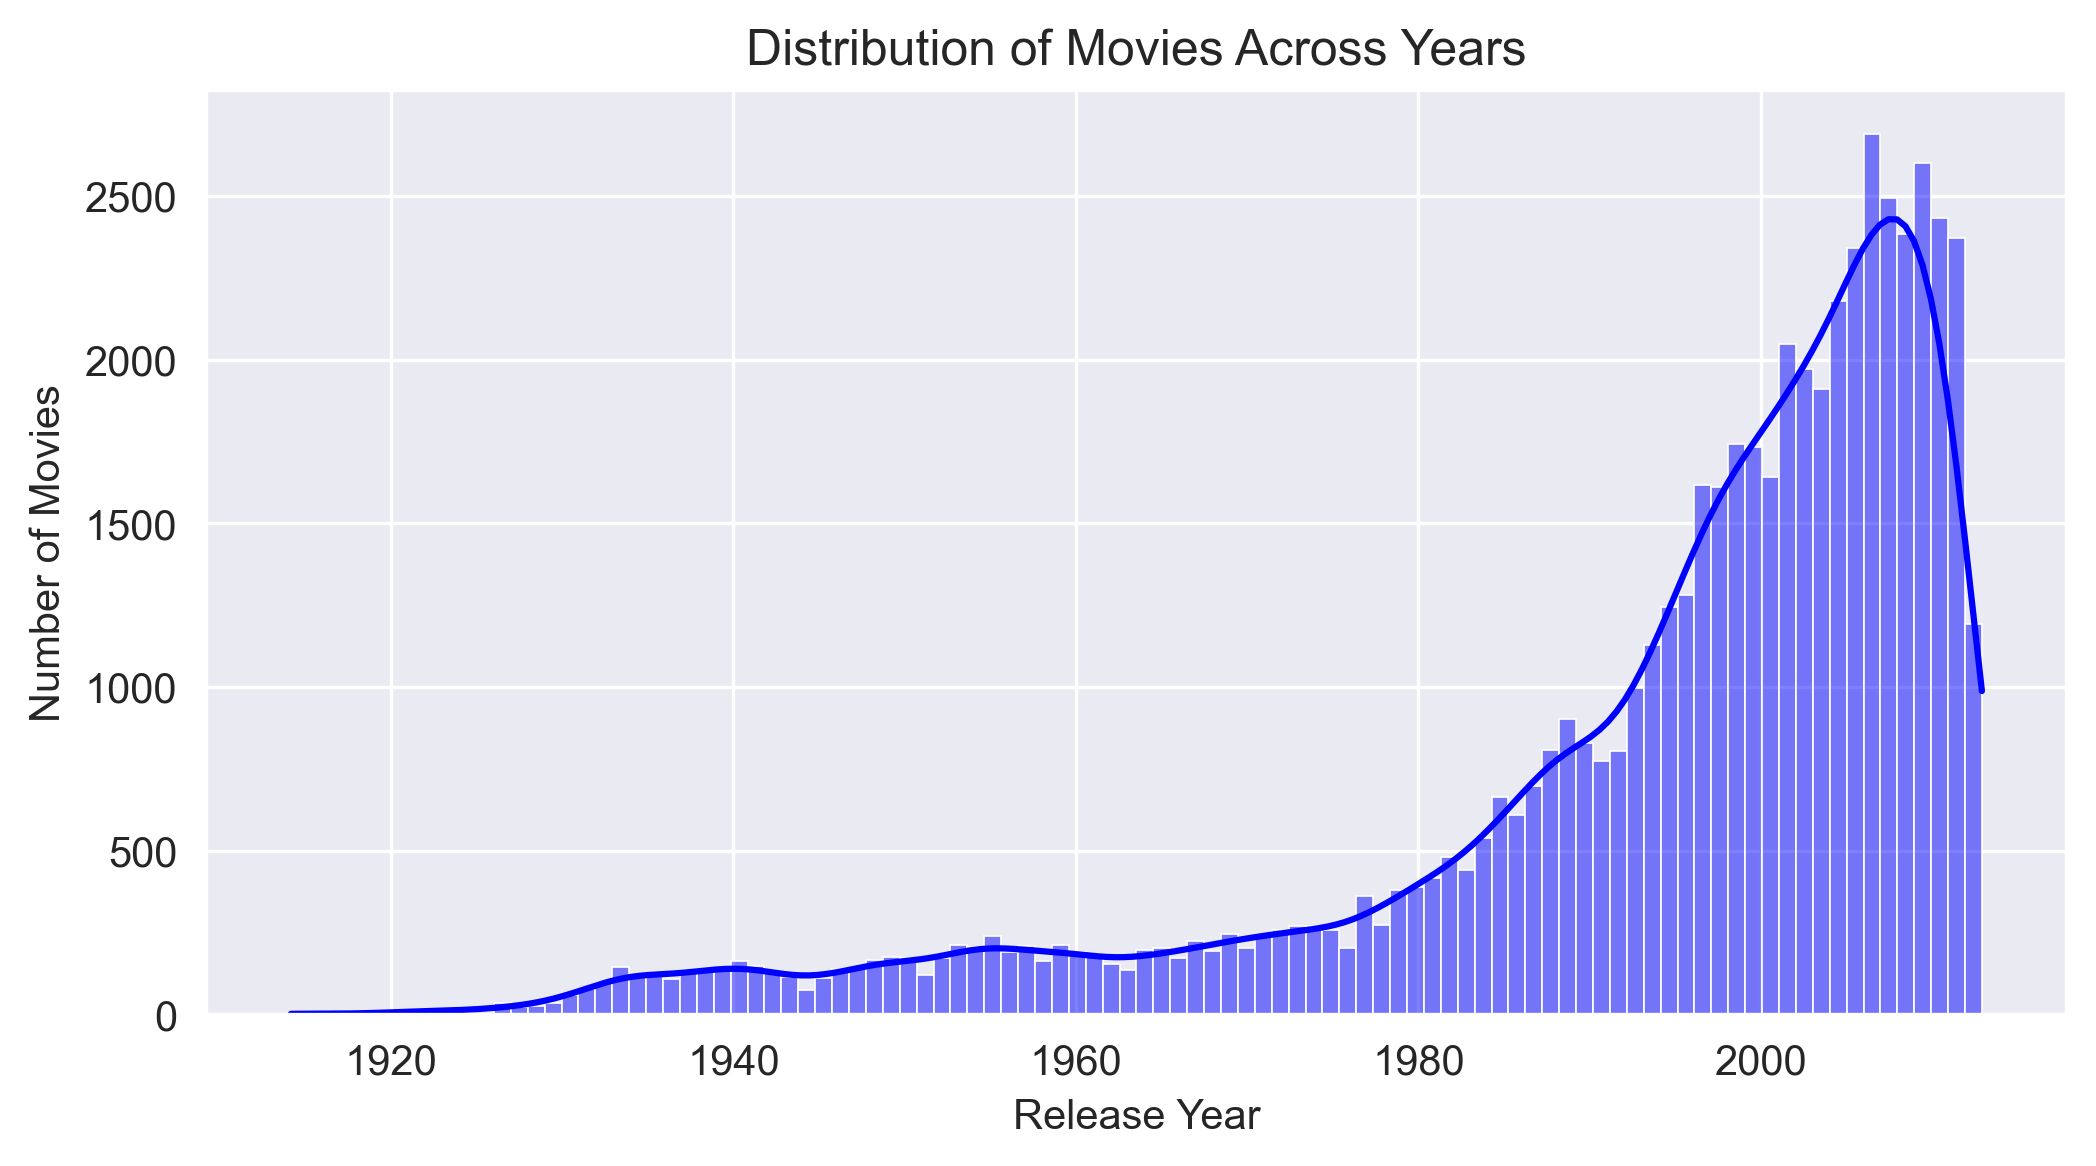

In [9]:
viz.visualize_year_distribution(movies)

## II.2 Missing values analysis

                            Missing Values  Percentage
writer_gender                        39769   69.644327
writer                               39073   68.425477
actor_ethni_fbid                     29427   51.533194
movie_bo_revenue                     18646   32.653276
character_name                       15905   27.853178
fbid_char                            15905   27.853178
producer_gender                      15660   27.424128
producer                             14975   26.224542
actor_age_at_movie_release            1679    2.940301
director_gender                       1246    2.182022
actor_date_of_birth                    496    0.868606
director                               169    0.295956
actor_gender                            49    0.085810


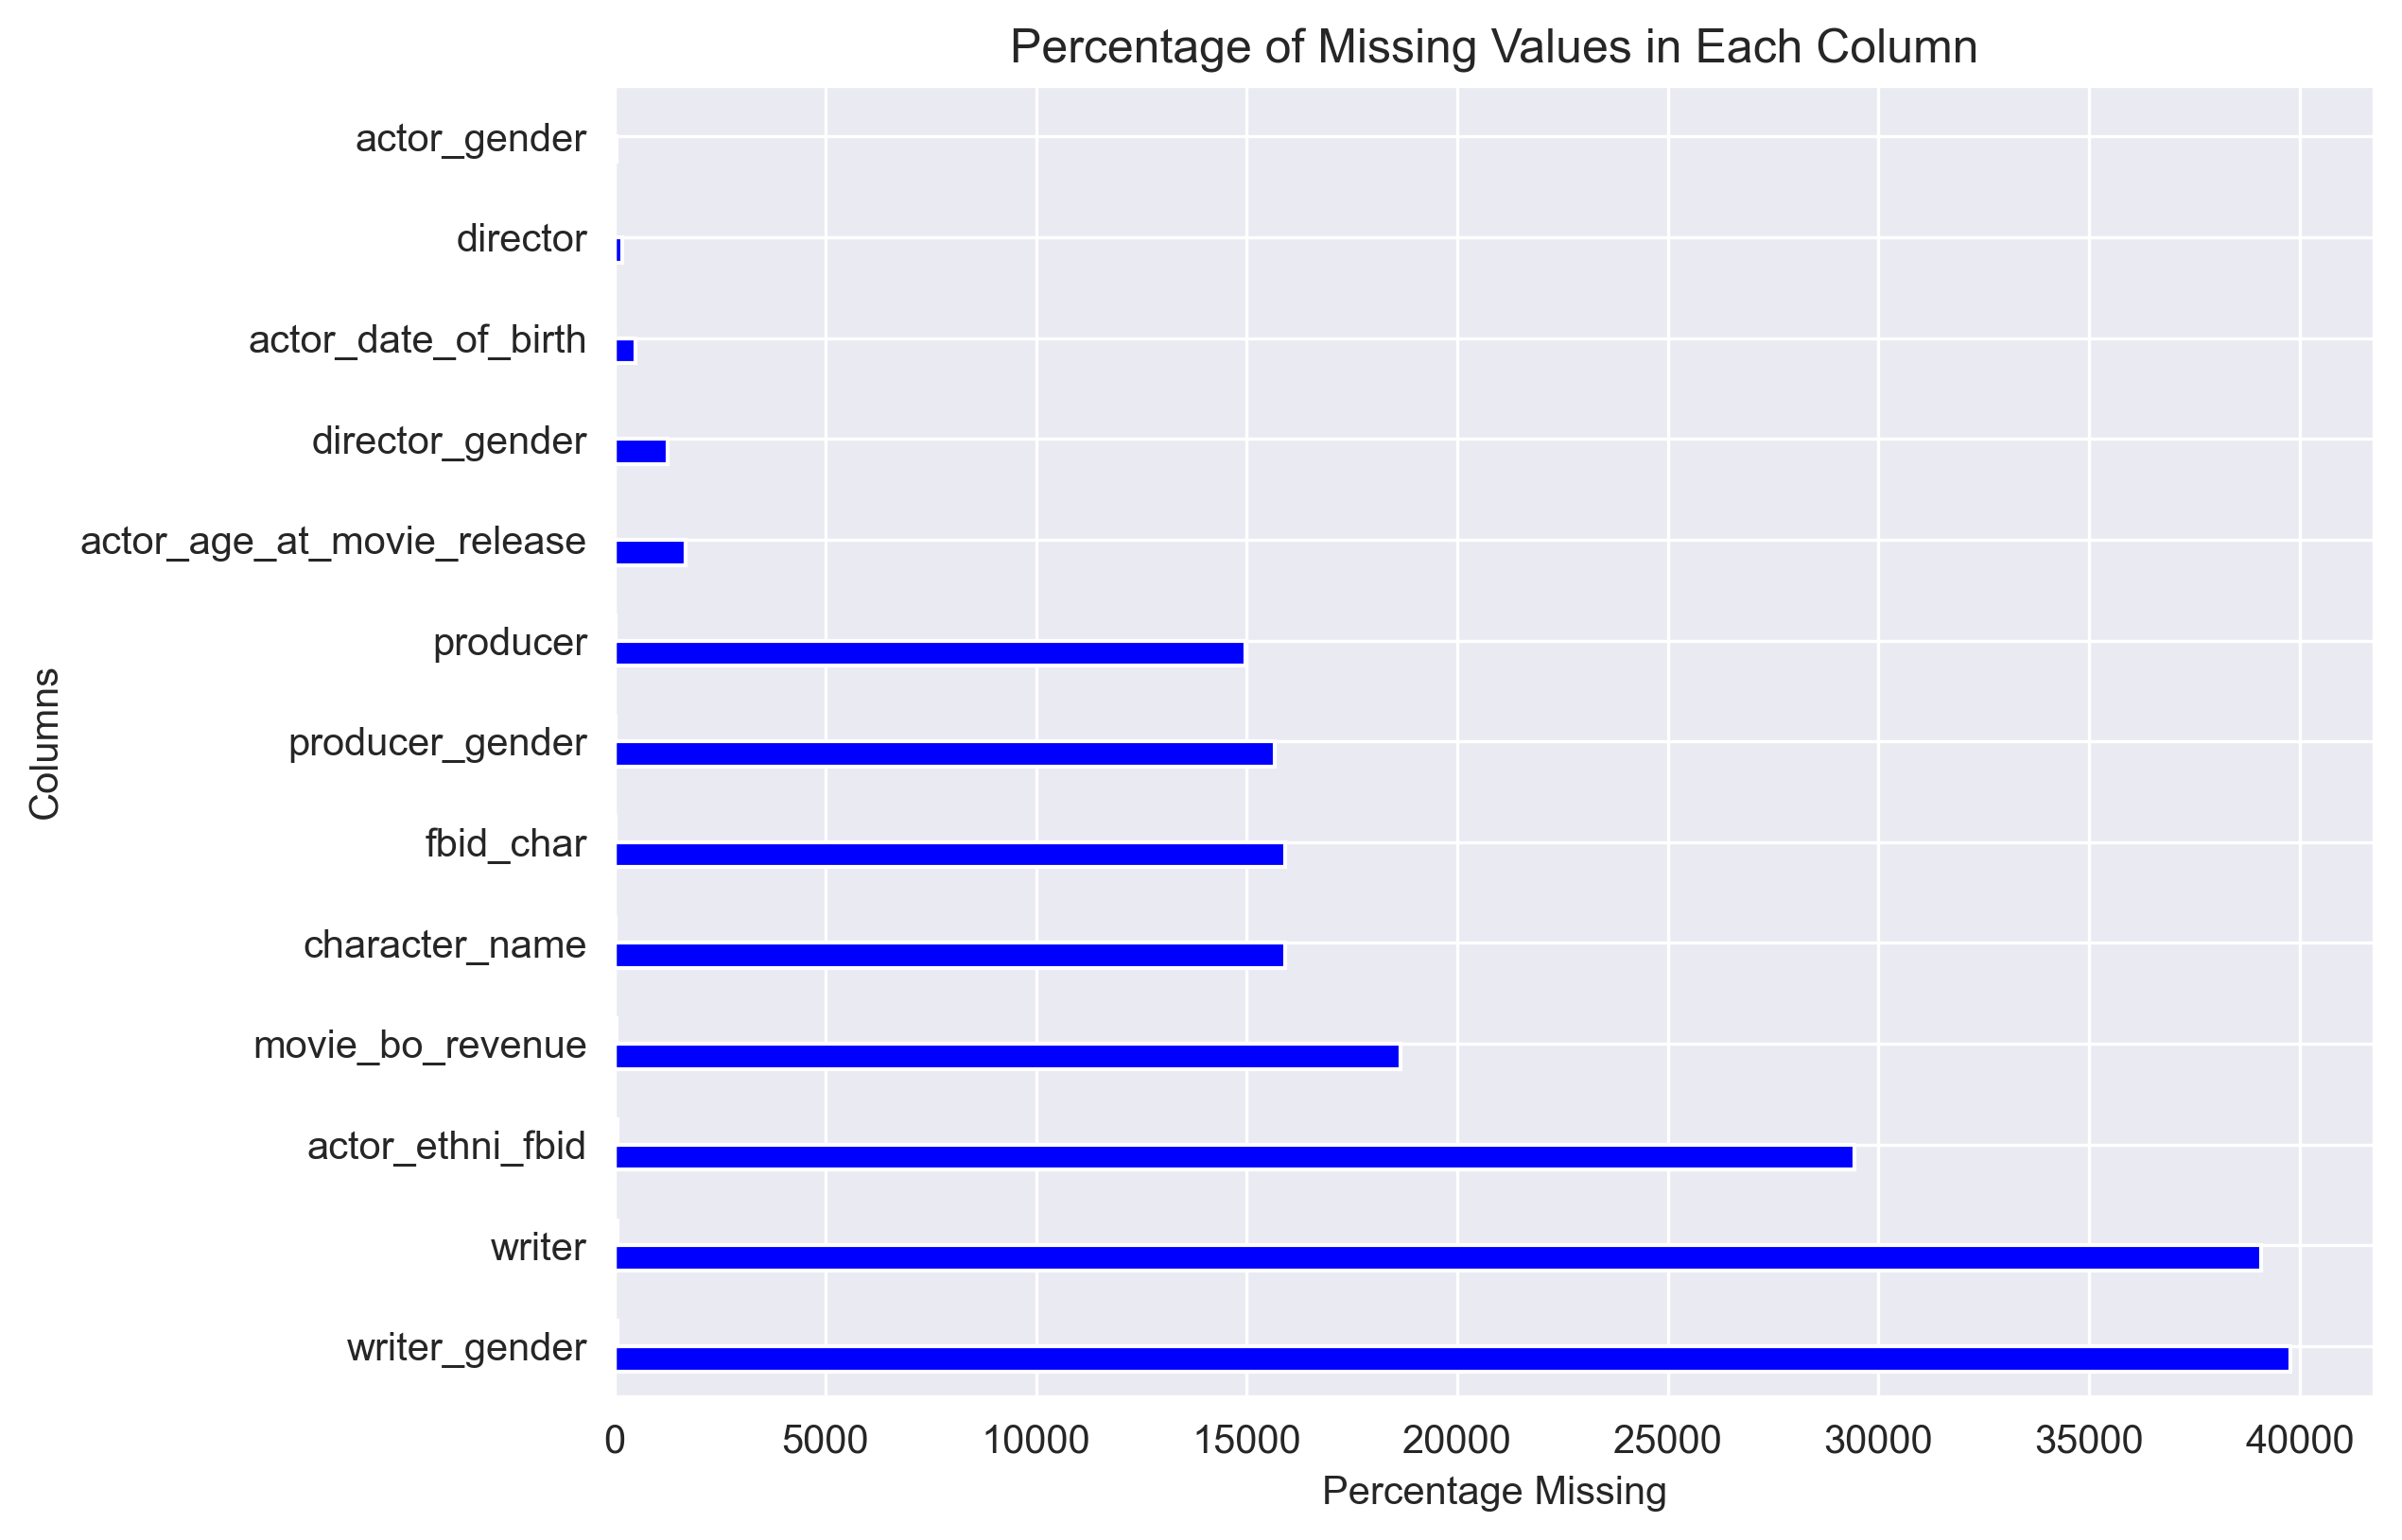

In [10]:
viz.visualize_missing_values(movies)

 Based on this analysis, drop columns with a lot of missing values  (according to a threshold, say 50%)

# II.3 Distribution of Key Features

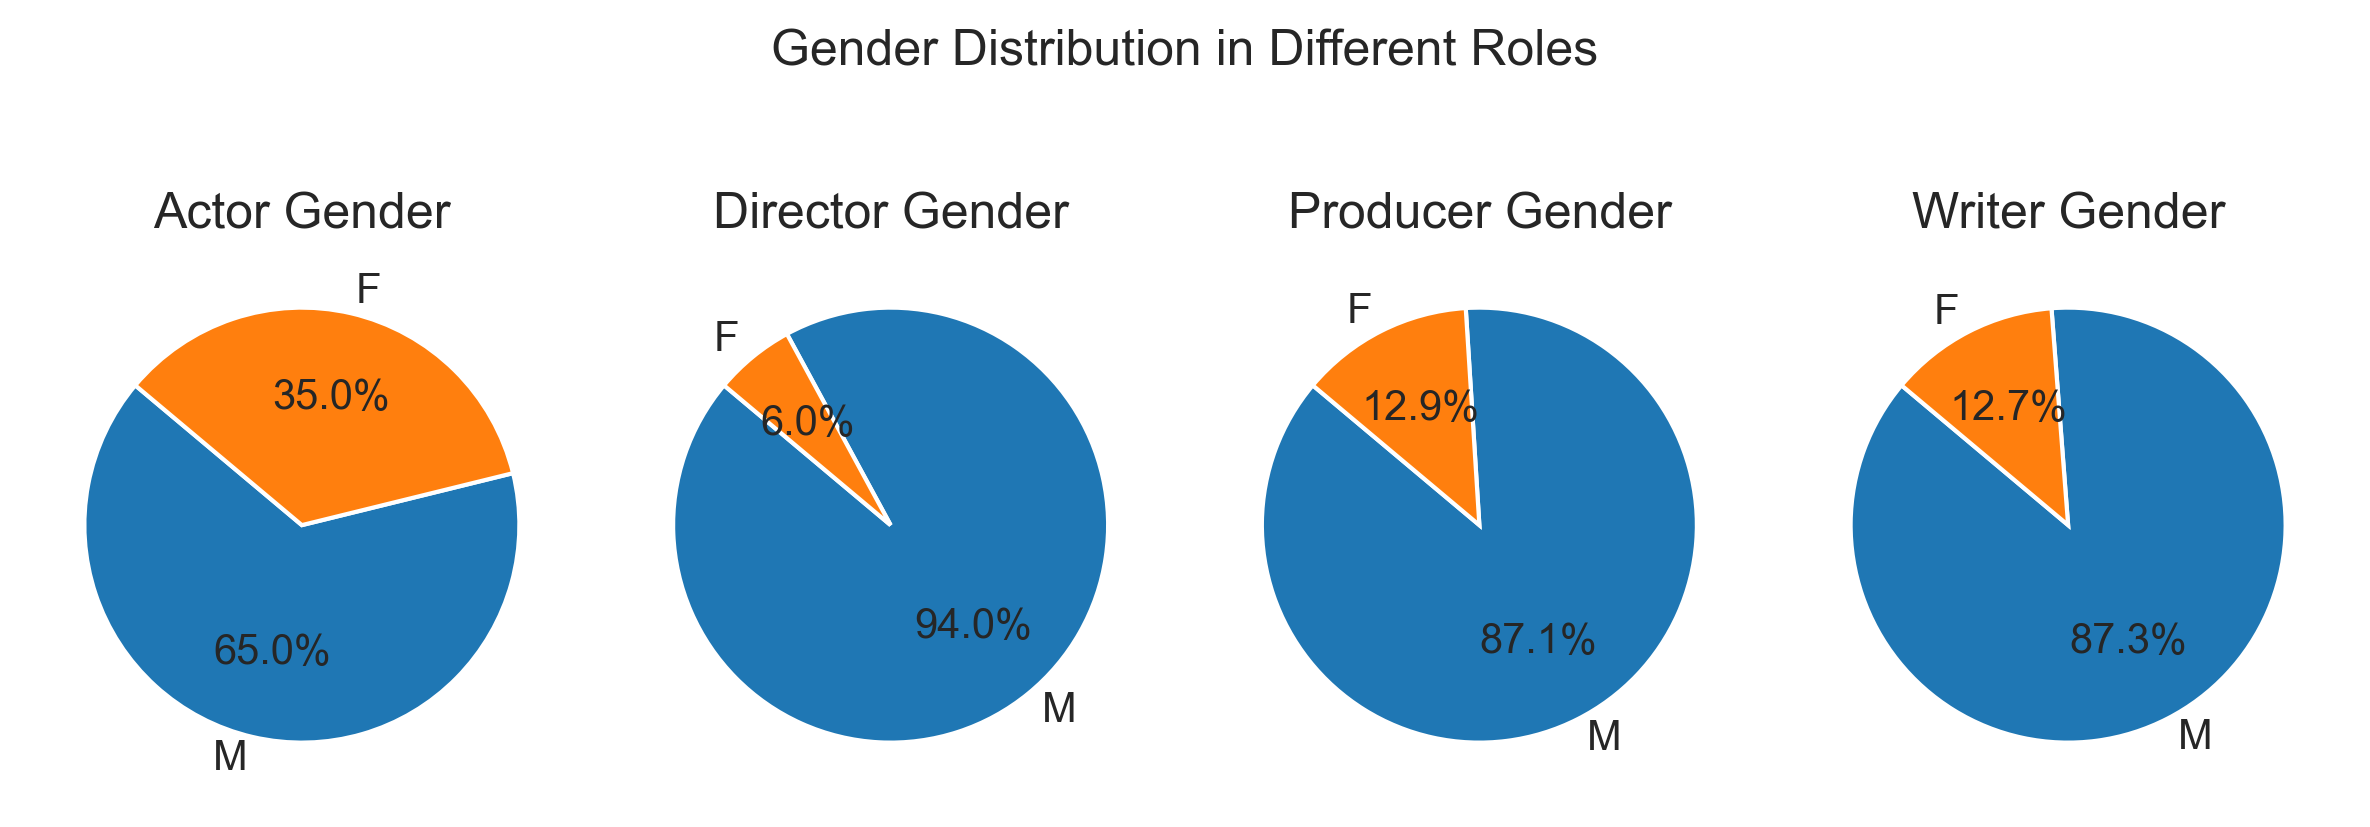

In [11]:
viz.visualize_gender_distribution(movies)

Todo: Explain

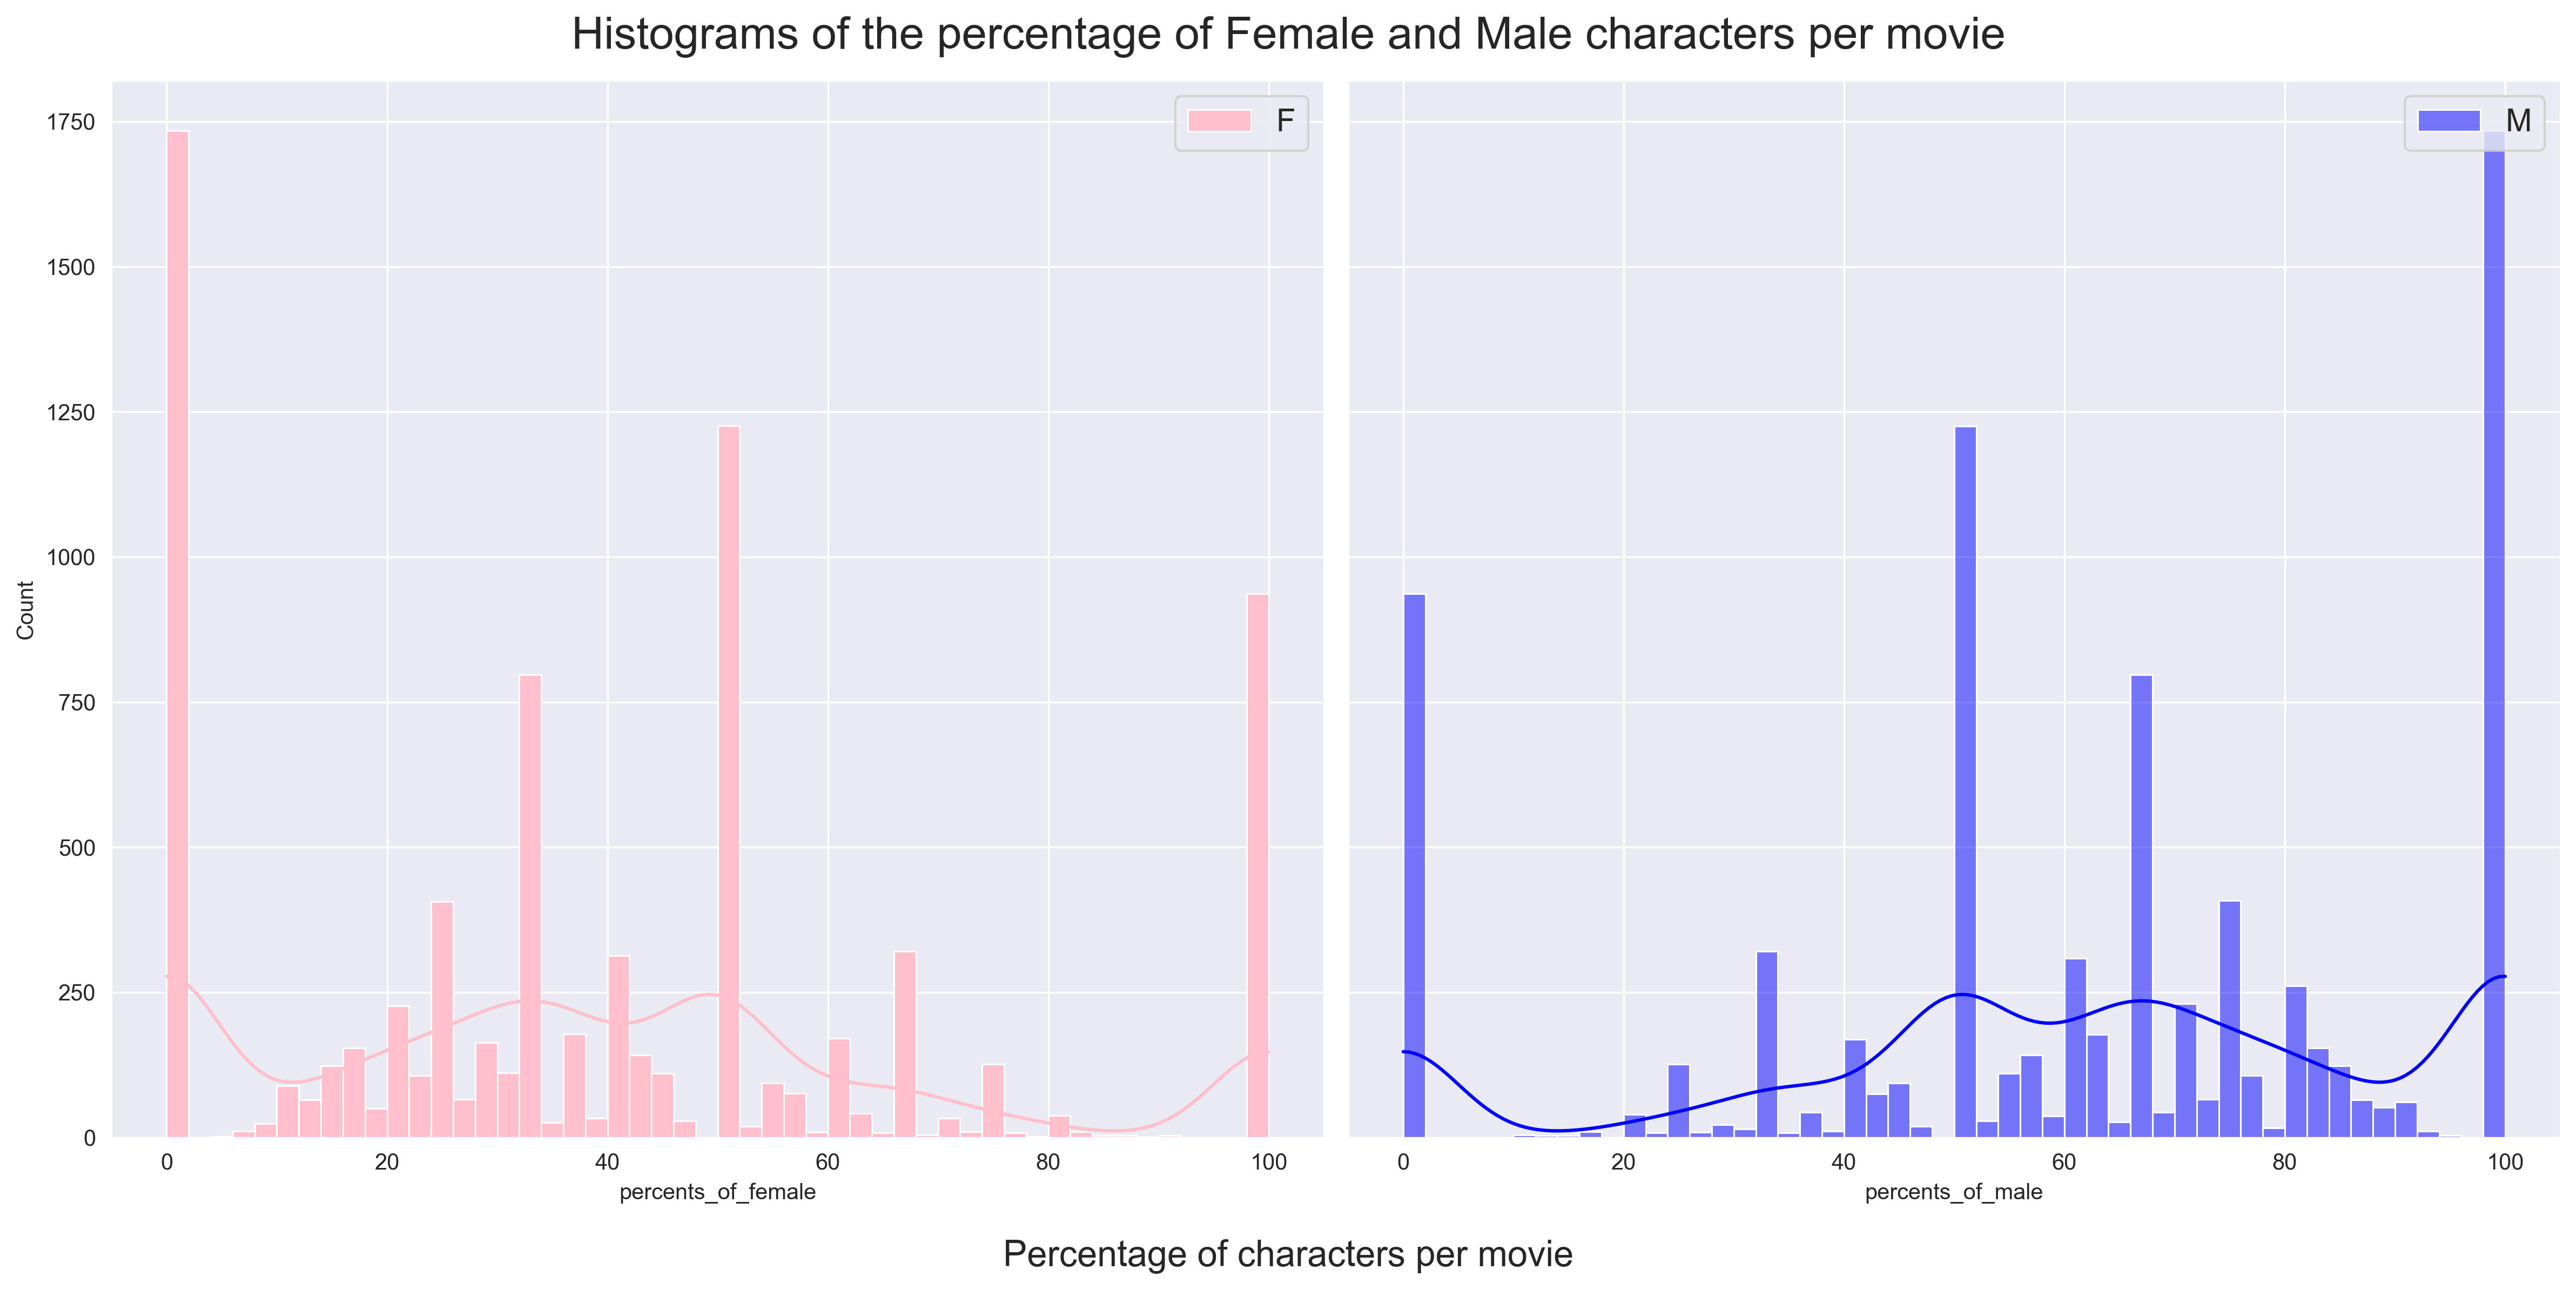

In [12]:
viz.visualize_gender_proportion_repartition(movies)

TODO: Explain

# III NLP feasibility on plot summary


**Break down of the ideas for the NLP analysis**
- 1. Preprocessing of the plot summaries
    - clean the texts, remove ponctuation etc
    - tokenize the plot summarize as it will be helpful for subsequent analysis
    - add some additional information to the dataframe that can be usefull later like the length of summary
    - create 2 set of plot summary, one for the movies that pass the bechdel test, and the other for the rest
- 2. Word frequency analysis
    - occurrence of gender specific word comparison
    - some statistical analysis
    
- 3. Sentiment analysis 



## Preprocessing of the texts and cleaning

In [13]:
df_summaries = loader.load_summaries()
df_summaries = pd.merge(df_summaries, movies[['wikiID', 'movie_title']], on='wikiID', how='right').drop_duplicates().dropna(subset=['movie_title'])


In [14]:
import pandas as pd
import re
import nltk
import string 
from nltk.corpus import stopwords

#Here we clean the text representation of each summary to make it easier to analyse

nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

def clean_text(text):
    text = text.lower()
    text = re.sub(r'\[.*?\]', '', text)
    text = re.sub(r'[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub(r'\w*\d\w*', '', text)
    return ' '.join(word for word in text.split() if word not in stop_words)

df_summaries['summary'] = df_summaries['summary'].apply(clean_text)


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\kenji\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [15]:
df_summaries.head()

,wikiID,summary,movie_title
0,975900,set second half century film depicts mars plan...,Ghosts of Mars
9,171005,plotdateact finally negotiations made henry na...,Henry V
21,77856,film opens mary poppins perched cloud high lon...,Mary Poppins
29,156558,young named jody lives mother juanita amg movi...,Baby Boy
37,12053509,randy bodek rebellious college slacker living ...,Loverboy


### tokenization


In [16]:
from nltk.tokenize import word_tokenize

#Simply tokenize the corpus so we can access each word separatly
nltk.download('punkt')
df_summaries['tokens'] = df_summaries['summary'].apply(word_tokenize)
df_summaries['len'] = df_summaries['summary'].apply(lambda x: len(x))

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\kenji\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


## creation of the 2 dataframe for comparison


In [17]:
summary_bechdel_df = pd.merge(bechdel_df, df_summaries, on='movie_title').drop(['imdbid', 'year', 'summary'], axis=1)

# DataFrame of movies that pass the Bechdel test (rating of 3)
pass_bechdel_df = summary_bechdel_df[summary_bechdel_df['bechdel_rating'] == 3].drop('bechdel_rating', axis=1)

# DataFrame of movies that don't pass the Bechdel test (rating of 2 or less)
dont_pass_bechdel_df = summary_bechdel_df[summary_bechdel_df['bechdel_rating'] <= 2].drop('bechdel_rating', axis=1)


In [18]:
pass_bechdel_df.reset_index(drop = True)

,movie_title,wikiID,tokens,len
0,Cinderella,399402,"[cinderella, muchloved, child, widowed, aristo...",2752
1,Cinderella,1303197,"[village, square, herald, proclaims, prince, g...",2039
2,Cinderella,399402,"[cinderella, muchloved, child, widowed, aristo...",2752
3,Cinderella,1303197,"[village, square, herald, proclaims, prince, g...",2039
4,Cinderella,399402,"[cinderella, muchloved, child, widowed, aristo...",2752
...,...,...,...,...
1600,Cousins,576204,"[larry, kozinski, maria, hardy, meet, marriage...",861
1601,Stowaway,15127637,"[barbara, chingching, stewart, orphan, living,...",552
1602,Oxygen,3691494,"[harry, houdini, kidnapped, buried, alive, ric...",1252
1603,Look Both Ways,2701438,"[film, charts, stories, several, people, hot, ...",943


In [19]:
dont_pass_bechdel_df.reset_index(drop = True)

,movie_title,wikiID,tokens,len
0,Bluebeard,6552222,"[paris, frightened, murders, attributed, blueb...",1707
1,Cleopatra,13269570,"[cleopatra, aged, school, teacher, struggles, ...",315
2,Cleopatra,13269570,"[cleopatra, aged, school, teacher, struggles, ...",315
3,Safety Last!,76313,"[film, opens, harold, lloyd, behind, bars, mot...",1918
4,Why Worry?,5016035,"[harold, van, pelham, rich, businessman, fanci...",558
...,...,...,...,...
1292,Breath,16703978,"[loner, housewife, yeon, deals, depression, an...",340
1293,Limbo,3024499,"[film, set, fictional, port, henry, alaska, to...",2044
1294,Nightmare Alley,2006189,"[movie, follows, rise, fall, con, man, —, stor...",1920
1295,Athena,1978686,"[conservative, lawyer, adam, calhorn, shaw, ho...",2043


## word frequency

In [20]:
from collections import Counter

word_counts = Counter(word for tokens in df_summaries['tokens'] for word in tokens)
most_common_words = word_counts.most_common(20)  


In [21]:
most_common_words

[('one', 10033),
 ('back', 8475),
 ('tells', 7360),
 ('two', 7282),
 ('new', 6471),
 ('home', 5961),
 ('later', 5823),
 ('find', 5775),
 ('time', 5668),
 ('father', 5602),
 ('finds', 5540),
 ('house', 5538),
 ('get', 5488),
 ('however', 5393),
 ('man', 5295),
 ('also', 5168),
 ('film', 5100),
 ('life', 5031),
 ('go', 5000),
 ('goes', 4725)]

Here the idea is to count the occurence of some gender specific word in each summary 

In [22]:
# List of gender-specific words
female_words = [
    'she', 'her', 'hers', 'woman', 'women', 'female', 'girl', 'girls', 'lady', 'ladies', 'daughter', 'daughters',
    'mother', 'mothers', 'mom', 'moms', 'mum', 'mums', 'wife', 'wives', 'girlfriend', 'girlfriends', 'sister', 'sisters',
    'aunt', 'aunts', 'grandmother', 'grandmothers', 'granddaughter', 'granddaughters', 'niece', 'nieces', 'female',
    'feminine', 'her', 'herself', 'madam', 'maiden', 'matriarch', 'queen', 'princess', 'bride'
]
male_words = [
    'he', 'him', 'his', 'man', 'men', 'male', 'boy', 'boys', 'guy', 'guys', 'gentleman', 'gentlemen', 'son', 'sons',
    'father', 'fathers', 'dad', 'dads', 'husband', 'husbands', 'boyfriend', 'boyfriends', 'brother', 'brothers',
    'uncle', 'uncles', 'grandfather', 'grandfathers', 'grandson', 'grandsons', 'nephew', 'nephews', 'male',
    'masculine', 'himself', 'sir', 'lad', 'patriarch', 'king', 'prince', 'groom'
]

# Count occurrences in summaries
dont_pass_bechdel_df['F word freq'] = dont_pass_bechdel_df['tokens'].apply(lambda x: sum(word in x for word in female_words)/len(x))
dont_pass_bechdel_df['M word freq'] = dont_pass_bechdel_df['tokens'].apply(lambda x: sum(word in x for word in male_words)/len(x))

dont_pass_bechdel_df['F word count'] = dont_pass_bechdel_df['tokens'].apply(lambda x: sum(word in x for word in female_words))
dont_pass_bechdel_df['M word count'] = dont_pass_bechdel_df['tokens'].apply(lambda x: sum(word in x for word in male_words))

pass_bechdel_df['F word freq'] = pass_bechdel_df['tokens'].apply(lambda x: sum(word in x for word in female_words)/len(x))
pass_bechdel_df['M word freq'] = pass_bechdel_df['tokens'].apply(lambda x: sum(word in x for word in male_words)/len(x))

pass_bechdel_df['F word count'] = pass_bechdel_df['tokens'].apply(lambda x: sum(word in x for word in female_words))
pass_bechdel_df['M word count'] = pass_bechdel_df['tokens'].apply(lambda x: sum(word in x for word in male_words))


In [23]:
pass_bechdel_df.head()

,movie_title,wikiID,tokens,len,F word freq,M word freq,F word count,M word count
0,Cinderella,399402,"[cinderella, muchloved, child, widowed, aristo...",2752,0.021739,0.01087,8,4
1,Cinderella,1303197,"[village, square, herald, proclaims, prince, g...",2039,0.025830,0.01476,7,4
2,Cinderella,399402,"[cinderella, muchloved, child, widowed, aristo...",2752,0.021739,0.01087,8,4
3,Cinderella,1303197,"[village, square, herald, proclaims, prince, g...",2039,0.025830,0.01476,7,4
4,Cinderella,399402,"[cinderella, muchloved, child, widowed, aristo...",2752,0.021739,0.01087,8,4


## Statistical analysis 
Null Hypothesis (H0)
"The frequency of female-specific vocabulary in movie summaries is the same for movies that pass the Bechdel test and for those that do not."

Alternative Hypothesis (H1)
"The frequency of female-specific vocabulary in movie summaries is higher in movies that pass the Bechdel test compared to those that do not."

T-Statistic: 10.881701581328308
P-Value: 4.6630374705244106e-27


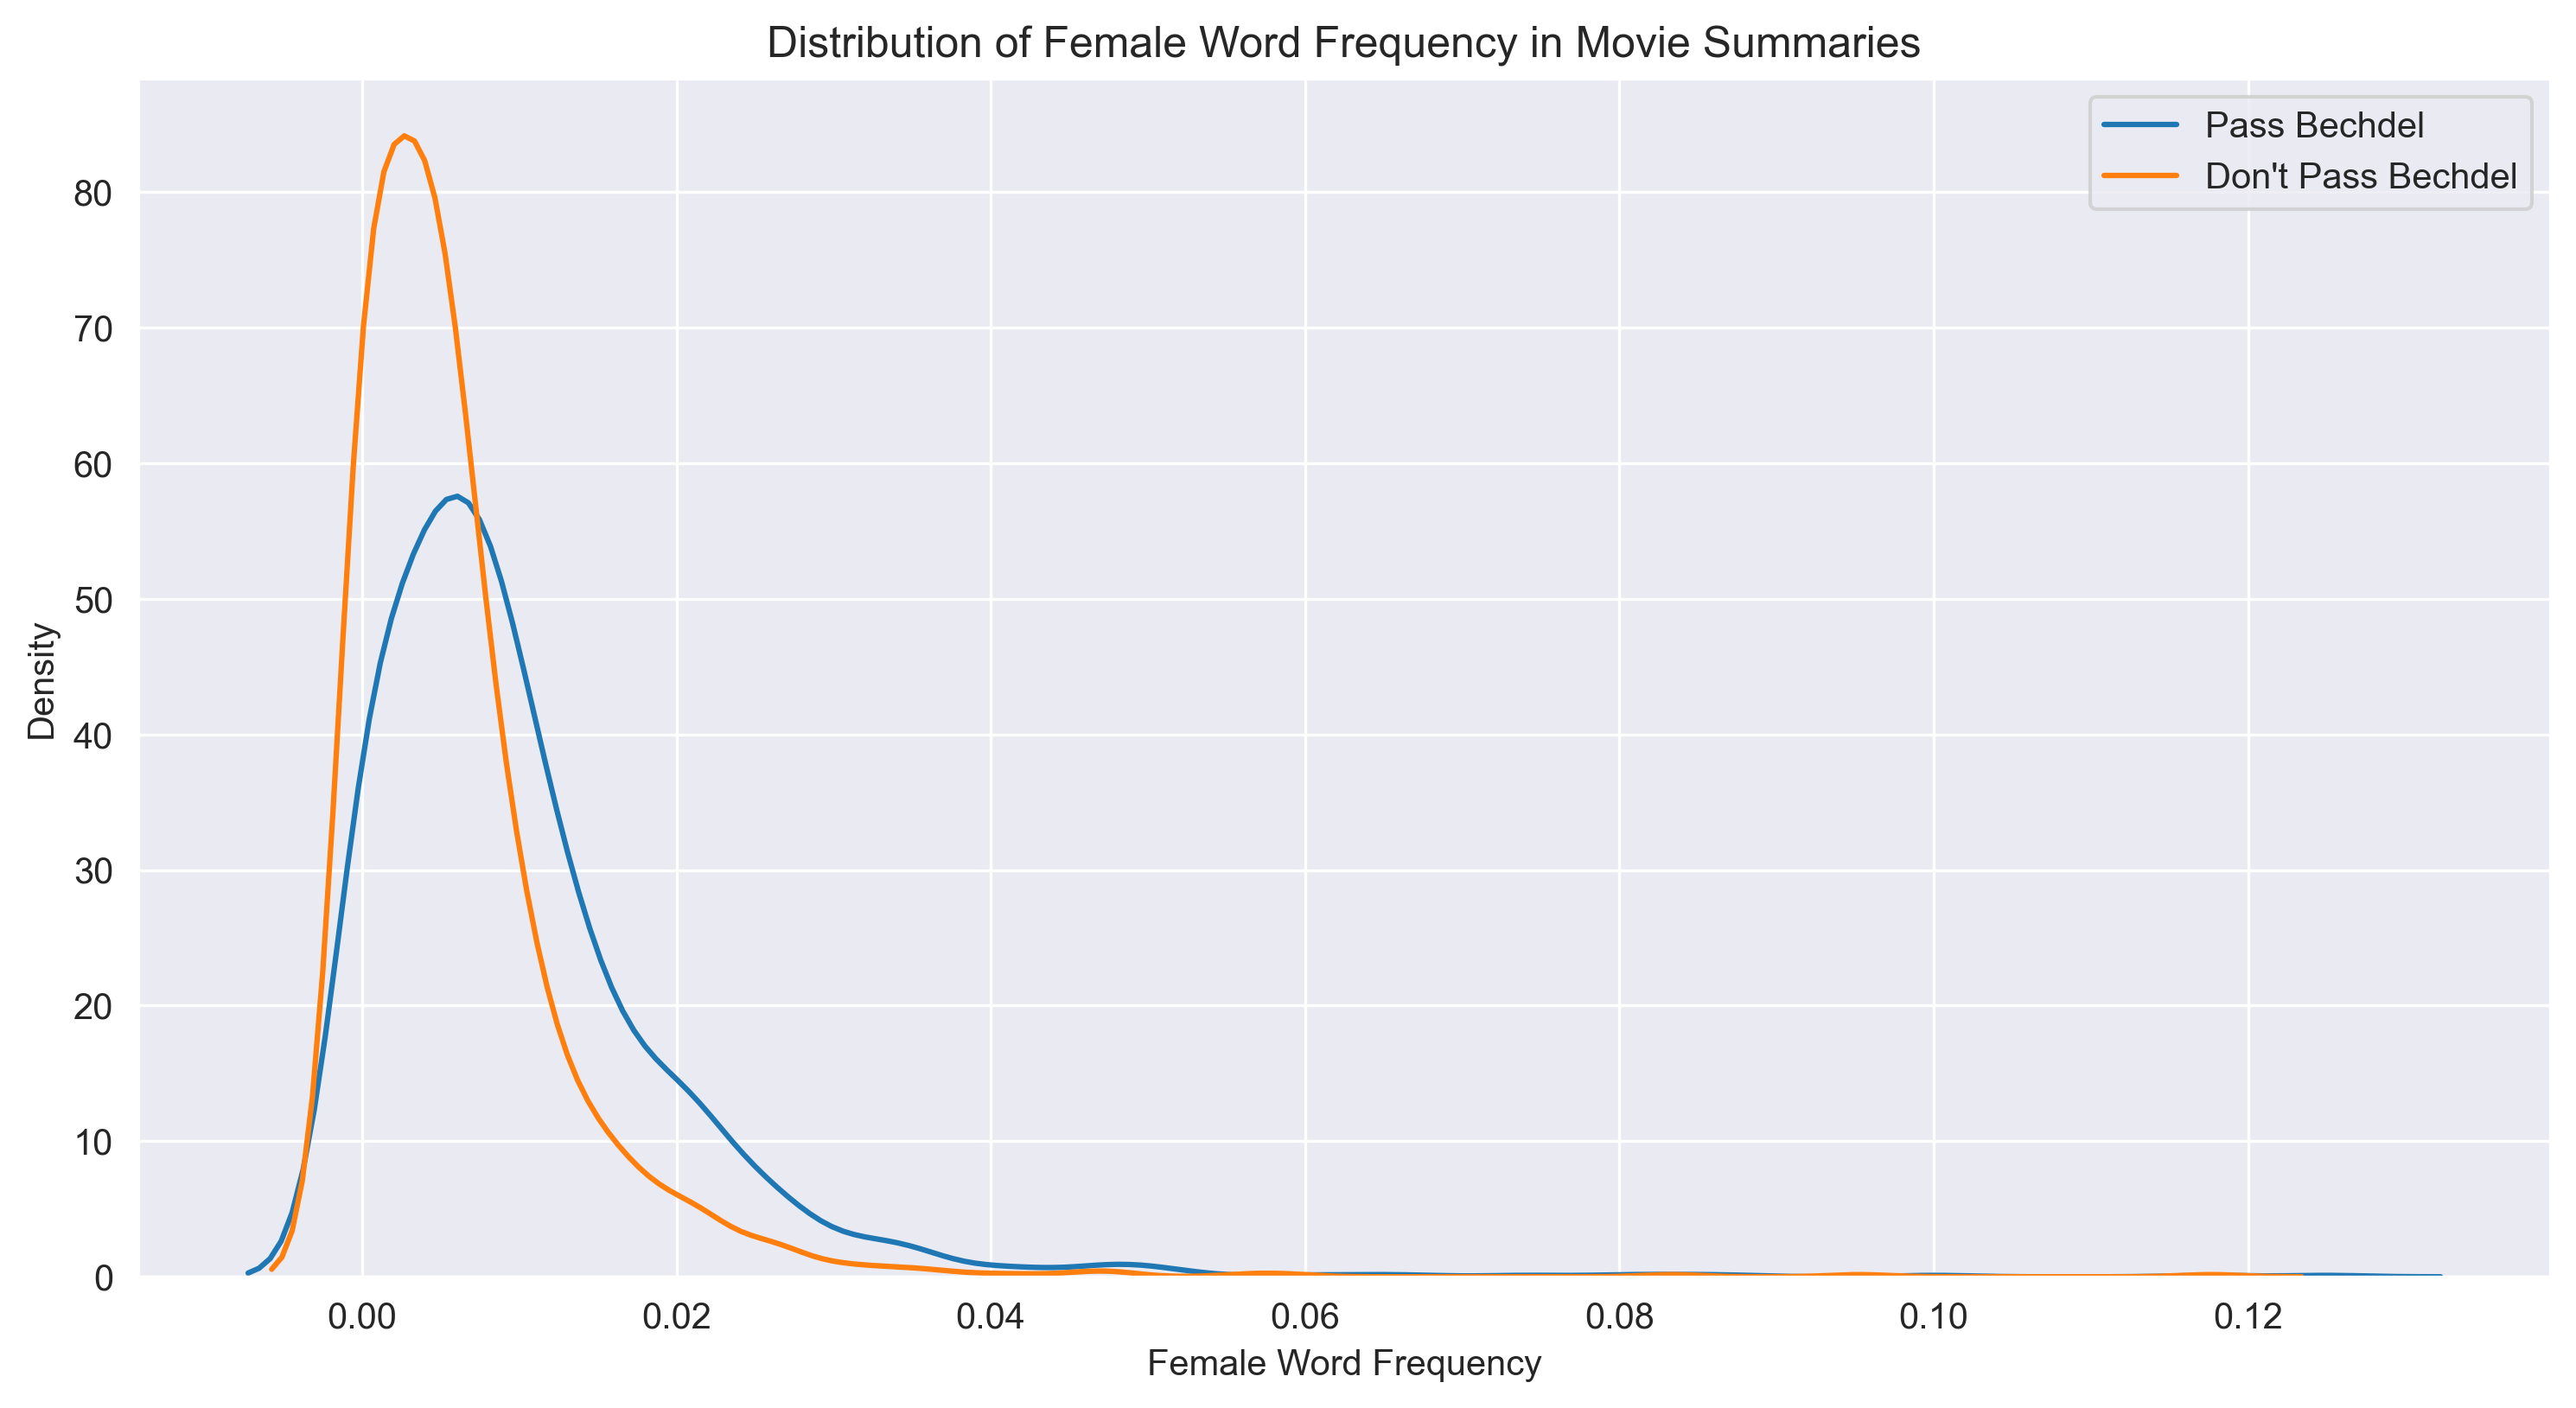

In [24]:
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Conducting the t-test on the female word frequency
t_stat, p_value = stats.ttest_ind(pass_bechdel_df['F word freq'], dont_pass_bechdel_df['F word freq'])

# Displaying the t-statistic and p-value
print(f"T-Statistic: {t_stat}")
print(f"P-Value: {p_value}")

# Visualization
plt.figure(figsize=(12, 6))

# Plotting distributions
sns.distplot(pass_bechdel_df['F word freq'], label='Pass Bechdel', hist=False, kde=True)
sns.distplot(dont_pass_bechdel_df['F word freq'], label='Don\'t Pass Bechdel', hist=False, kde=True)

# Adding legend and titles
plt.legend()
plt.title('Distribution of Female Word Frequency in Movie Summaries')
plt.xlabel('Female Word Frequency')
plt.ylabel('Density')

plt.show()


**Interpretation**\
Given the high T-Statistic and the very low P-Value, you can reject the null hypothesis with a high degree of confidence. This means that the data strongly suggests there is a statistically significant difference in the frequency of female-specific vocabulary in movie summaries between movies that pass the Bechdel test and those that do not. Specifically, since the T-Statistic is positive, it indicates that movies that pass the Bechdel test have a higher frequency of female-specific vocabulary compared to movies that do not pass the test.

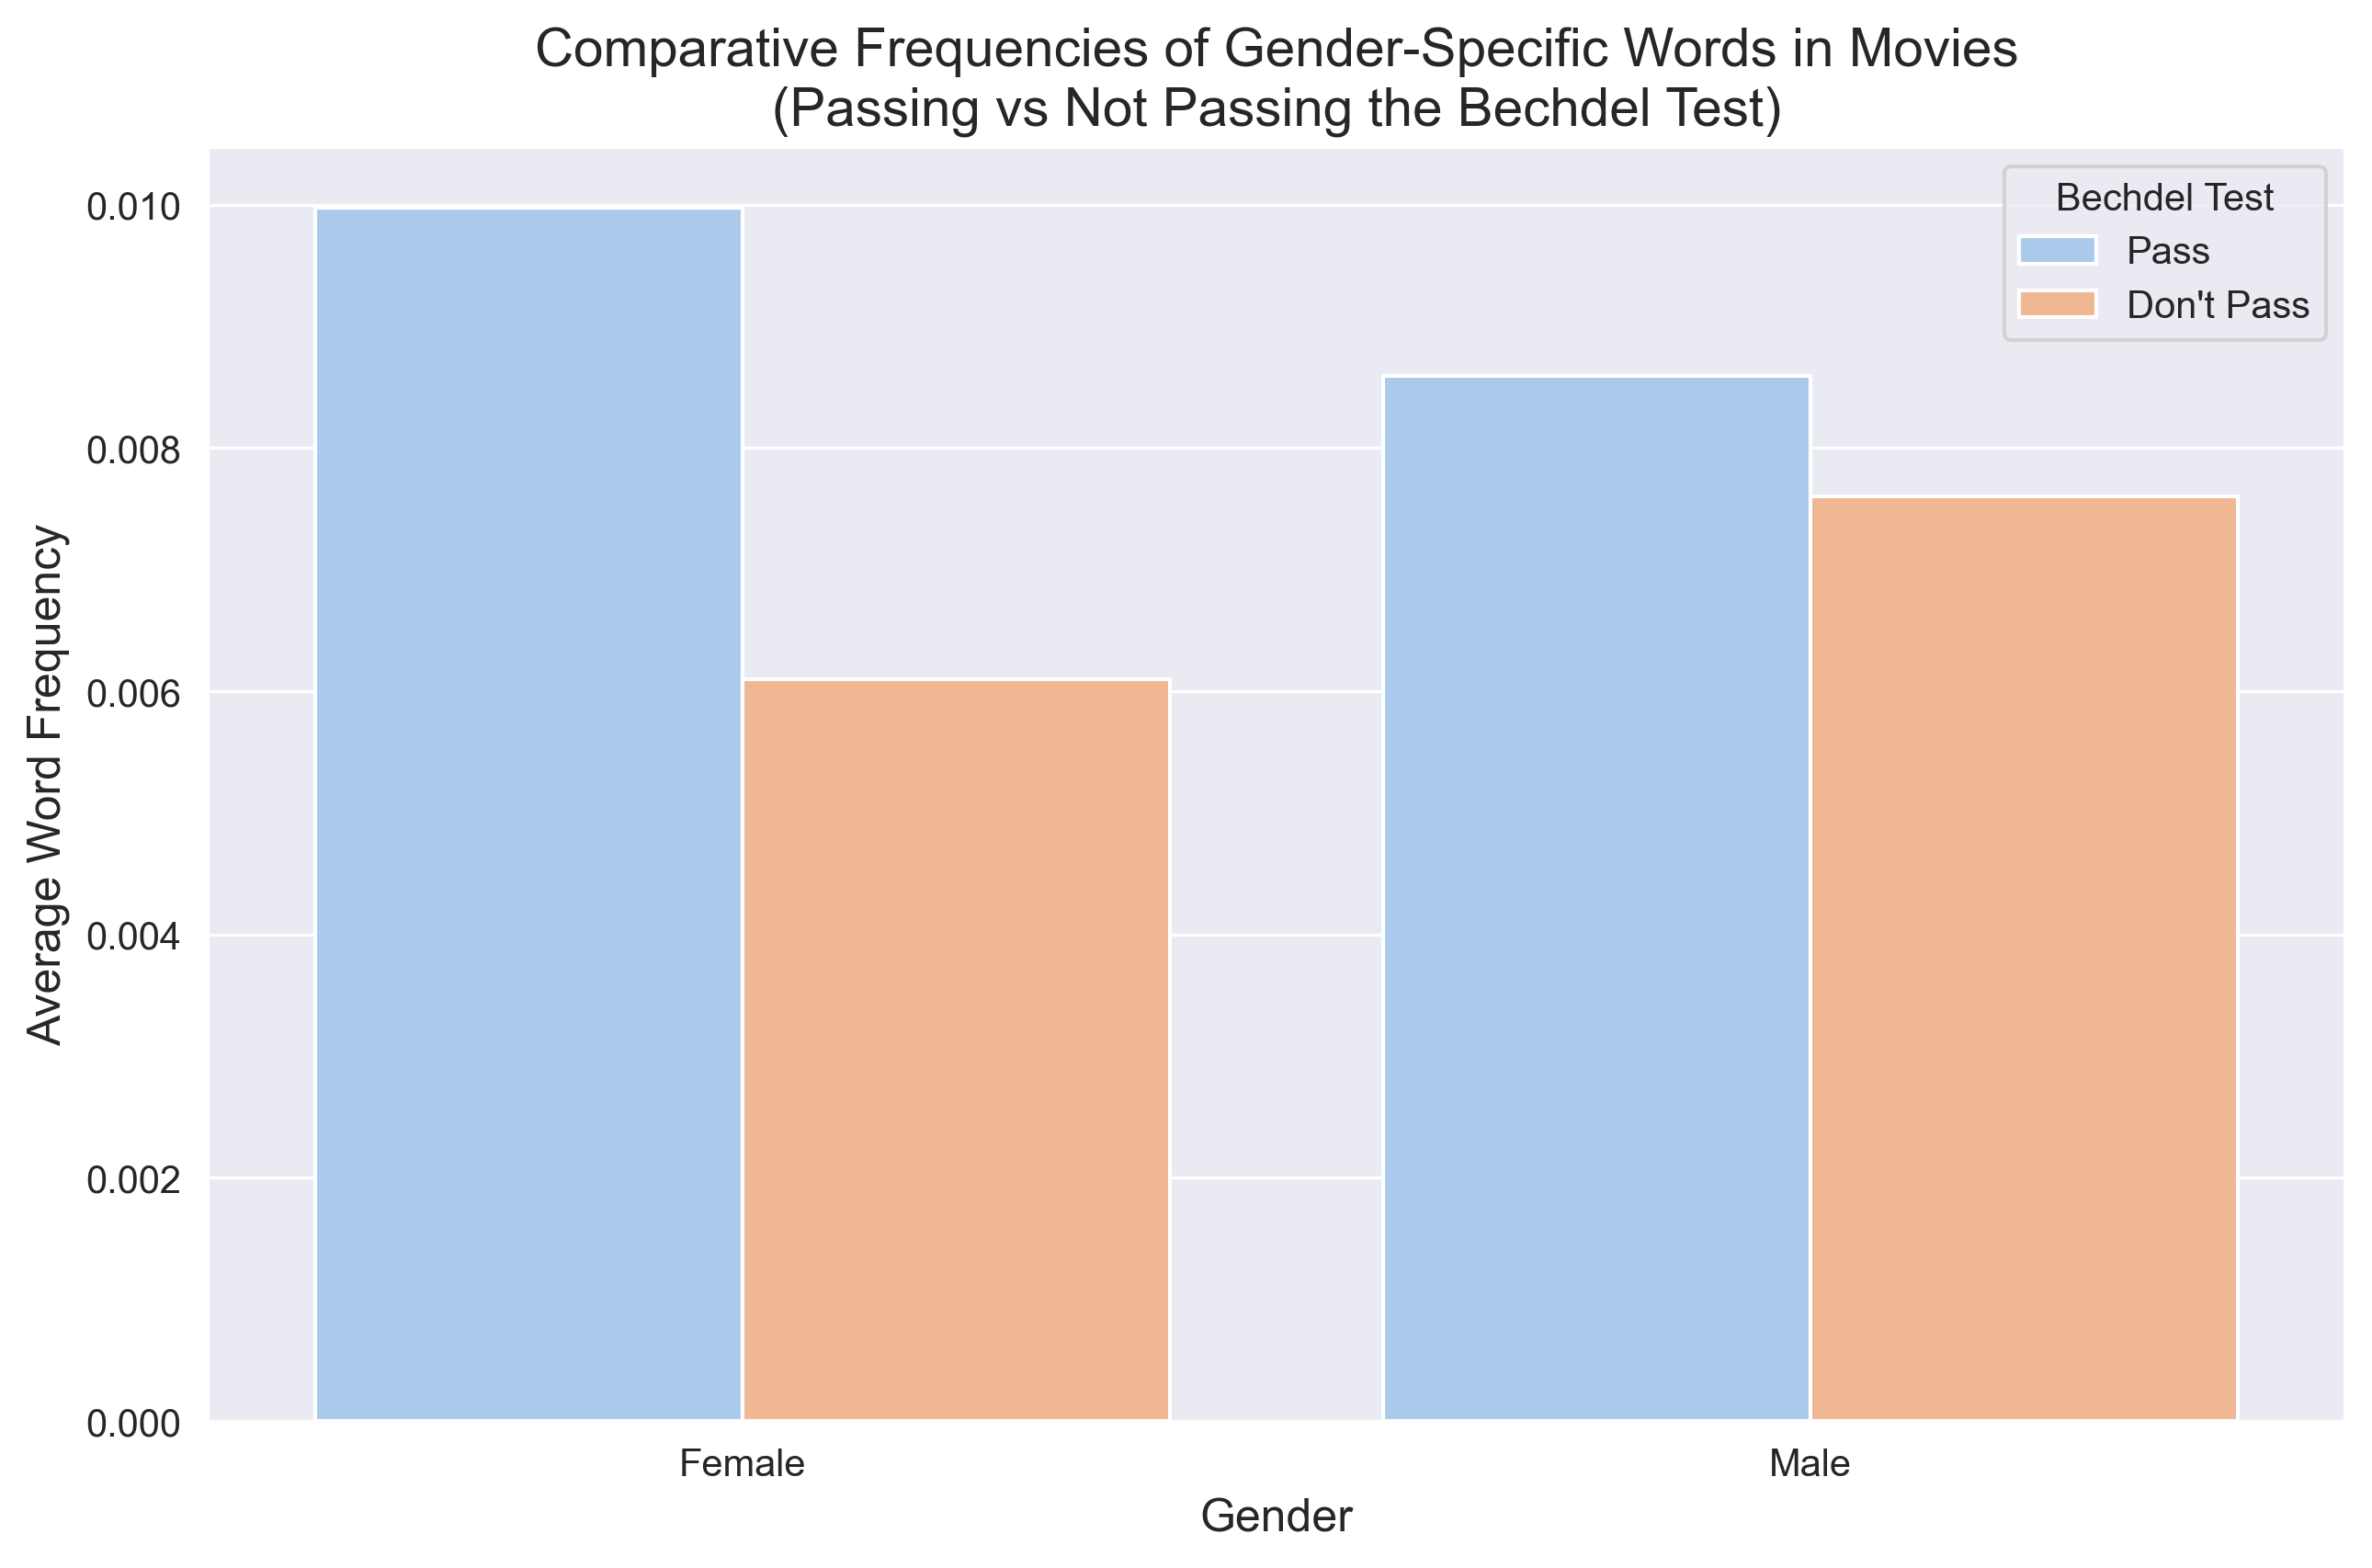

In [25]:

# Calculate average frequencies
avg_freq_pass = pass_bechdel_df[['F word freq', 'M word freq']].mean()
avg_freq_dont_pass = dont_pass_bechdel_df[['F word freq', 'M word freq']].mean()

# Creating a DataFrame for plotting
plot_data = pd.DataFrame({
    'Gender': ['Female', 'Male'] * 2,
    'Frequency': [avg_freq_pass['F word freq'], avg_freq_pass['M word freq'],
                  avg_freq_dont_pass['F word freq'], avg_freq_dont_pass['M word freq']],
    'Bechdel': ['Pass', 'Pass', 'Don\'t Pass', 'Don\'t Pass']
})

# Plotting
plt.figure(figsize=(10, 6))
sns.barplot(x='Gender', y='Frequency', hue='Bechdel', data=plot_data, palette='pastel')

# Adding titles and labels
plt.title('Comparative Frequencies of Gender-Specific Words in Movies\n(Passing vs Not Passing the Bechdel Test)', fontsize=14)
plt.xlabel('Gender', fontsize=12)
plt.ylabel('Average Word Frequency', fontsize=12)
plt.legend(title='Bechdel Test')

# Display plot
plt.show()


## Sentiment analysis

### Breakdown
**Import Necessary Libraries:**
- from transformers import pipeline: Imports the pipeline function from the transformers library, which simplifies the process of using pre-trained models.
        
**Initialize the Sentiment Analysis Pipeline:**

sentiment_pipeline = pipeline("sentiment-analysis"): Initializes a sentiment analysis pipeline that automatically loads a pre-trained model suited for sentiment analysis (default is distilbert-base-uncased-finetuned-sst-2-english).



**Handle Maximum Token Limitation:**

Transformer models, like BERT, have a maximum token length (512 tokens for BERT). Longer texts need to be truncated or split to avoid indexing errors. One approach is to make the assumption that the main sentiment of the plot summary is well present in the first 512 tokens so we can truncate the plot summary.


**Batch Processing and Sentiment Analysis:**

Process plot summaries in batches to manage memory usage efficiently.
Each batch of truncated summaries is passed to the sentiment analysis pipeline, which outputs the sentiment classification ('POSITIVE' or 'NEGATIVE') and a confidence score for each summary.


In [26]:
#Reload and reprocess the summary df
df_summaries2 = loader.load_summaries()
df_summaries2 = pd.merge(df_summaries2, movies[['wikiID', 'movie_title']], on='wikiID', how='right').drop_duplicates().dropna(subset=['movie_title'])
df_summaries2['summary'] = df_summaries2['summary'].apply(clean_text)

In [27]:
from transformers import pipeline

sentiment_pipeline = pipeline("sentiment-analysis")


No model was supplied, defaulted to distilbert-base-uncased-finetuned-sst-2-english and revision af0f99b (https://huggingface.co/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.
WARNING[XFORMERS]: xFormers can't load C++/CUDA extensions. xFormers was built for:
    PyTorch 2.1.0+cu121 with CUDA 1201 (you have 2.1.0+cpu)
    Python  3.11.6 (you have 3.11.4)
  Please reinstall xformers (see https://github.com/facebookresearch/xformers#installing-xformers)
  Memory-efficient attention, SwiGLU, sparse and more won't be available.
  Set XFORMERS_MORE_DETAILS=1 for more details


In [28]:
#Test on a small subset of the summaries
plot_summaries = df_summaries2['summary'].tolist()
plot_summaries_test = df_summaries2['summary'].tolist()[:200]


In [32]:
from transformers import DistilBertTokenizer

# Load the tokenizer for the DistilBERT model
tokenizer = DistilBertTokenizer.from_pretrained('distilbert-base-uncased')

# Initialize the sentiments list
sentiments = []
batch_size = 10

for i in tqdm(range(0, len(plot_summaries_test), batch_size)):
    batch = plot_summaries[i:i + batch_size]
    # Truncate the summaries using the tokenizer
    truncated_batch = [tokenizer.decode(tokenizer.encode(summary, max_length=512, truncation=True), skip_special_tokens=True) for summary in batch]
    batch_sentiments = sentiment_pipeline(truncated_batch)
    sentiments.extend(batch_sentiments)


100%|██████████████████████████████████████████████████████████████████████████████████| 20/20 [01:13<00:00,  3.67s/it]


sentiment
NEGATIVE    177
POSITIVE     23
Name: count, dtype: int64


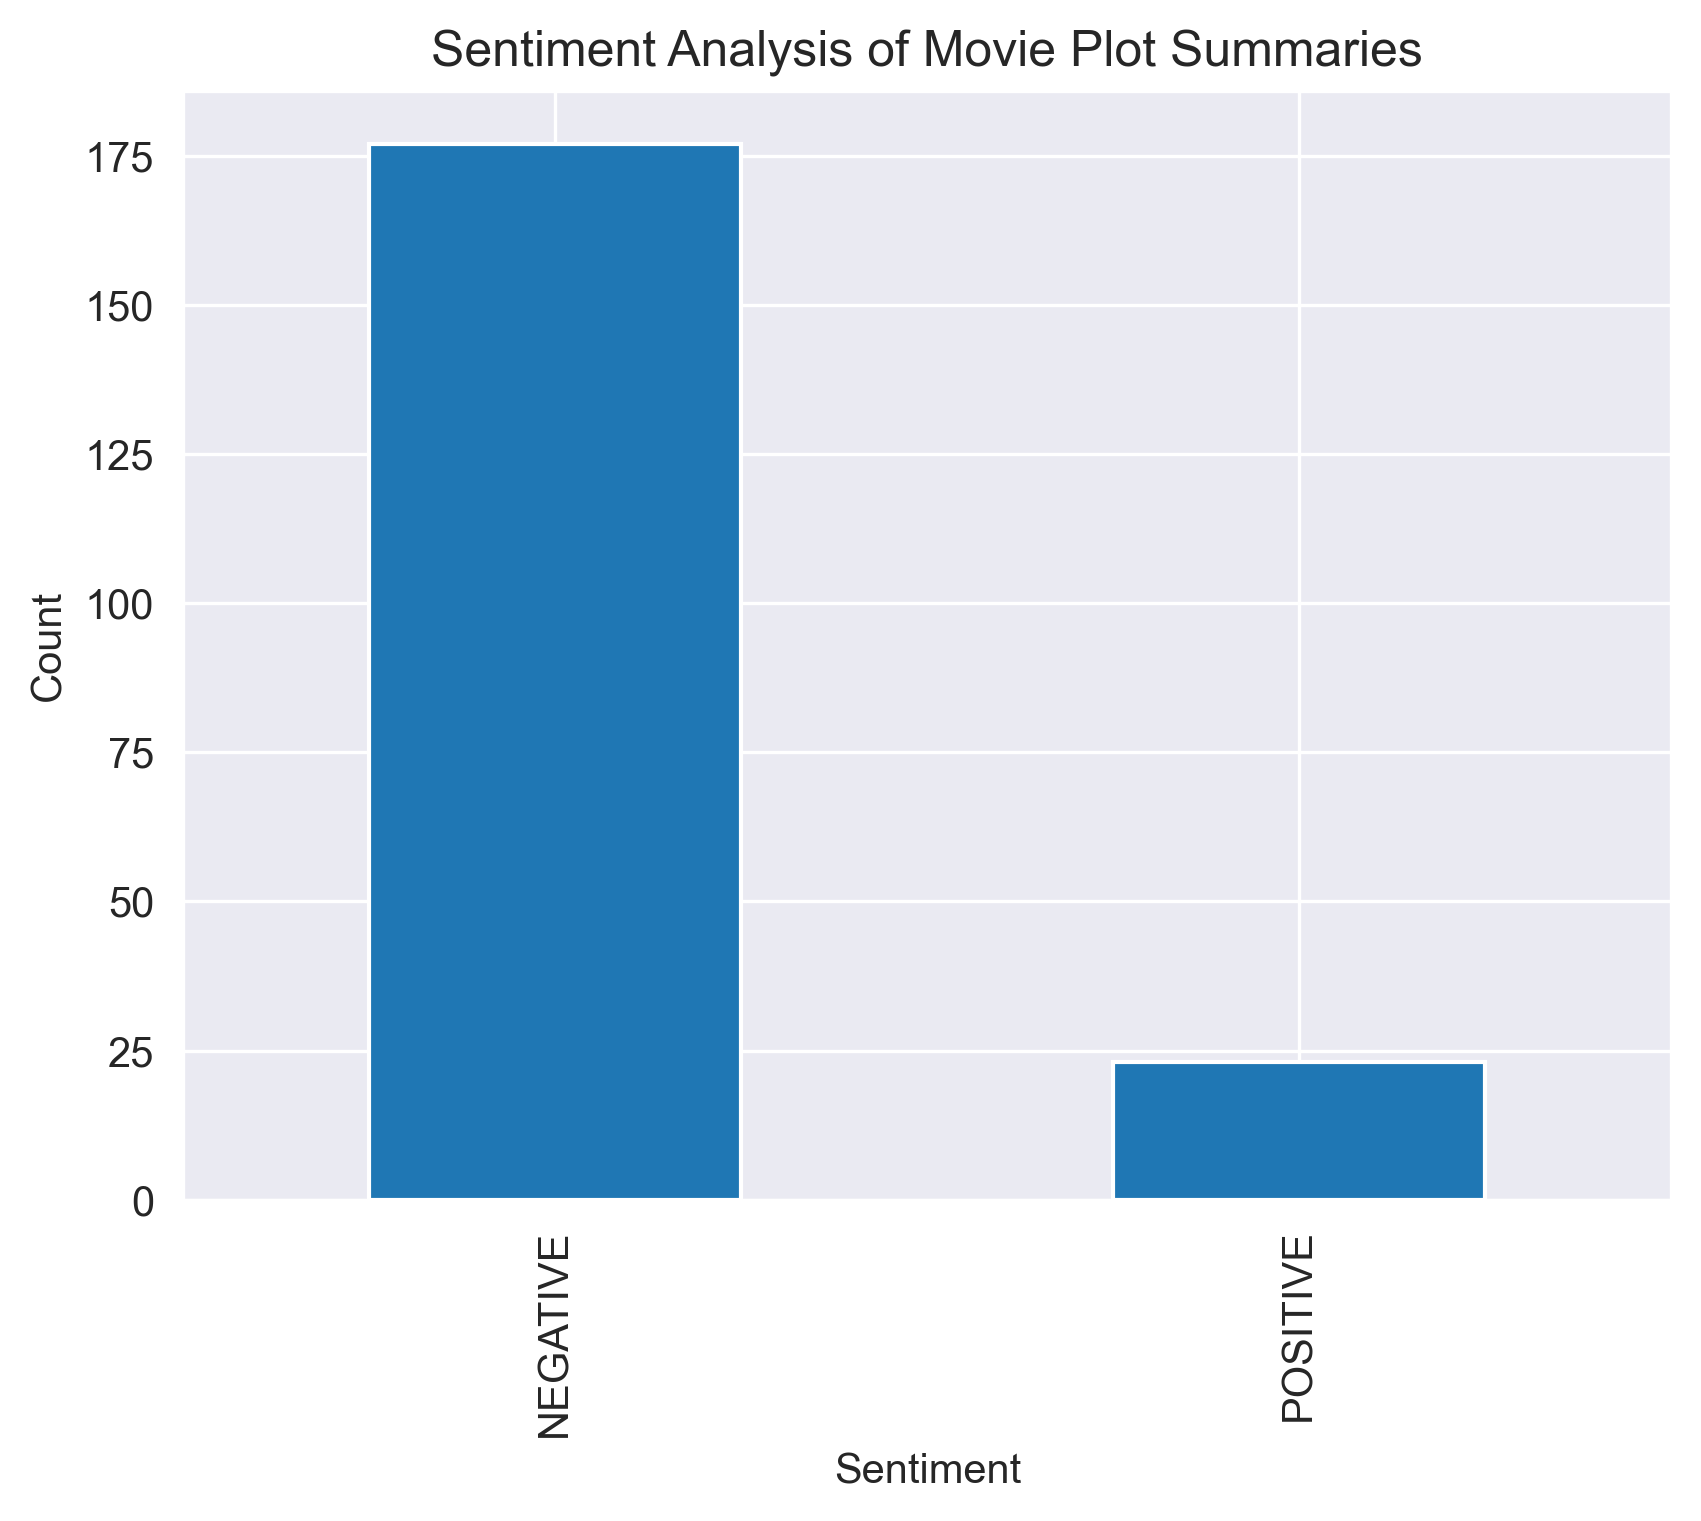

In [34]:
df_summaries2_test = df_summaries2.copy(deep = True)
df_summaries2_test = df_summaries2_test.head(200)

# Add the sentiment results to your dataframe
df_summaries2_test['sentiment'] = [item['label'] for item in sentiments]
df_summaries2_test['sentiment_score'] = [item['score'] for item in sentiments]

# Example: Count the number of positive and negative summaries
sentiment_counts = df_summaries2_test['sentiment'].value_counts()
print(sentiment_counts)

# Visualizing the sentiment distribution
sentiment_counts.plot(kind='bar')
plt.title('Sentiment Analysis of Movie Plot Summaries')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()
